In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.get_data import *
from IPython.display import clear_output
from src.preprocessing import *
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import random

%load_ext autoreload
%autoreload 2

<b>Load Data</b>

In [3]:
bd_full = pd.read_csv('data/business.csv')
#bd_full['attributes_AgesAllowed'].unique()

In [4]:
b_data, u_data, reviews = get_training_data(verbose=True)
v_queries = get_validation_reviews()

X, y = construct_design_matrix(b_data, u_data, reviews, verbose=True)
X_valid, y_valid = construct_design_matrix(b_data, u_data, v_queries, verbose=True)

b_data.head()


========== Feature 'attributes_AgesAllowed' ==========
TYPE: string. Doing one-hot encoding.

========== Feature 'attributes_GoodForKids' ==========
TYPE: boolean. Changing False -> 0, True -> 1.
Detected NaN in column. Replacing with mean of non-NaN values.

========== Feature 'attributes_OutdoorSeating' ==========
TYPE: boolean. Changing False -> 0, True -> 1.
Detected NaN in column. Replacing with mean of non-NaN values.

========== Feature 'attributes_RestaurantsDelivery' ==========
TYPE: boolean. Changing False -> 0, True -> 1.
Detected NaN in column. Replacing with mean of non-NaN values.

========== Feature 'attributes_RestaurantsGoodForGroups' ==========
TYPE: boolean. Changing False -> 0, True -> 1.
Detected NaN in column. Replacing with mean of non-NaN values.

========== Feature 'attributes_RestaurantsPriceRange2' ==========
TYPE: numeric.
Detected NaN in column. Replacing with mean of non-NaN values.

========== Feature 'attributes_RestaurantsReservations' ==========
TYPE: 

,attributes_GoodForKids,attributes_OutdoorSeating,attributes_RestaurantsDelivery,attributes_RestaurantsGoodForGroups,attributes_RestaurantsPriceRange2,attributes_RestaurantsReservations,stars,attributes_AgesAllowedNAN,attributes_AgesAllowed21PLUS,attributes_AgesAllowedALLAGES,attributes_AgesAllowed19PLUS,attributes_AgesAllowed18PLUS,attributes_WiFiNO,attributes_WiFiFREE,attributes_WiFiNAN,attributes_WiFiPAID
business_id,,,,,,,,,,,,,,,,
KuxDPl6UYNLxFChPm0_MNw,0.0,1.0,0.0,1.0,2.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
6SAfQKe2oM5g_EtcYXyAMg,1.0,1.0,0.0,1.0,1.0,0.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
upB0RQl-l529IVwgOpwOQQ,0.0,1.0,0.0,1.0,1.0,0.0,4.5,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
TulmRC5V0--dnXYd_GOSvA,1.0,0.0,0.0,1.0,2.0,0.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
yqYtY3-Po4OVPafA9Z-Xyw,1.0,0.0,0.0,1.0,2.0,1.0,3.5,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0


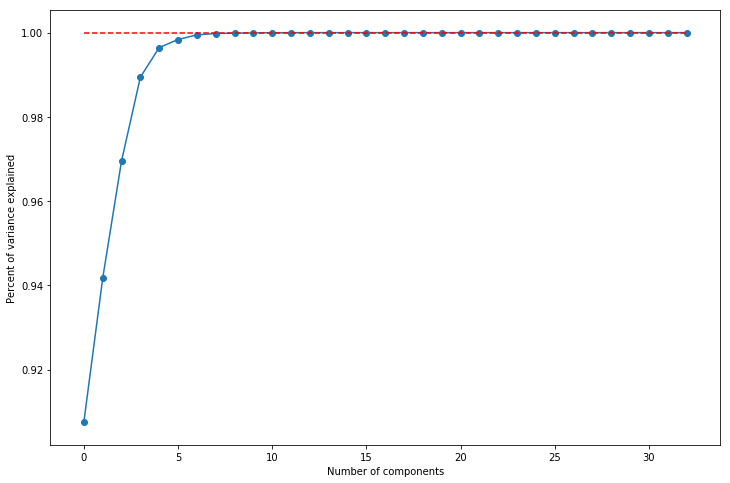

Using 10 components - 0.999978 of variance explained.


In [5]:
X_n = normalize_columns(X)
X_valid_n = normalize_columns(X_valid)

Z = get_PCA_matrix(X, n_components=10, plot_expl_variance=True, verbose=True)
X_pca = np.dot(X, Z.T)
X_valid_pca = np.dot(X_valid, Z.T)

In [6]:
results = dict()

def rmse(y1, y2):
    return np.sqrt(np.mean((y1-y2)**2))

In [19]:
ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=3), n_estimators=50, learning_rate=0.5)
ada_reg.fit(X, y)

'''
ada_reg_n = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=250, learning_rate=0.5)
ada_reg_n.fit(X_n, y)

ada_reg_pca = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=250, learning_rate=0.5)
ada_reg_pca.fit(X_pca, y)

y_pred_tr = ada_reg.predict(X)
mse_train = rmse(y, y_pred_tr)
print('%f  <- Training RMSE' % mse_train)

training error (normalized columns)
y_pred_tr_norm = ada_reg_n.predict(X_n)
mse_train_norm = rmse(y, y_pred_tr_norm)
print('%f  <- Training RMSE (norm)' % mse_train_norm)

training error (PCA)
y_pred_tr_pca = ada_reg_pca.predict(X_pca)
mse_train_pca = rmse(y, y_pred_tr_pca)
print('%f  <- Training RMSE (PCA)' % mse_train_pca)

print('')
'''
y_pred_valid = ada_reg.predict(X_valid)
mse_valid = rmse(y_valid, y_pred_valid)
print('%f  <- Validation RMSE' % mse_valid)

'''
validation error (normalized columns)
y_pred_valid_norm = ada_reg_n.predict(X_valid_n)
mse_valid_norm = rmse(y_valid, y_pred_valid_norm)
print('%f  <- Validation RMSE (norm)' % mse_valid_norm)

validation error (PCA)
y_pred_valid_pca = ada_reg_pca.predict(X_valid_pca)
mse_valid_pca = rmse(y_valid, y_pred_valid_pca)
print('%f  <- Validation RMSE (PCA)' % mse_valid_pca)
'''
print(y_pred_valid.shape)
y_pred_valid += 1
y_pred_valid = np.clip(y_pred_valid, 1, 5)
y_pred_valid = np.hstack(
    [np.arange(len(y_pred_valid), dtype=int).reshape(-1, 1), y_pred_valid.reshape(-1, 1)]
)
print(y_pred_valid.shape)

1.133808  <- Validation RMSE
(50077,)
(50077, 2)


In [27]:
'''#Tuning Hyperparameters

max_depths = [2, 3, 4, 5, 6]
estimators = [50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300]
learning_rates = [1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
best_rmse = 200
best_depth = 0
best_lr = 0
best_est = 0
for i in range(100):
    depth = np.random.choice(max_depths)
    estimator = np.random.choice(estimators)
    lr = np.random.choice(learning_rates)
    ada_reg_tune = AdaBoostRegressor(DecisionTreeRegressor(max_depth=depth), n_estimators=estimator, 
                                     learning_rate=lr)
    ada_reg_tune.fit(X, y)
    curr_ypred = ada_reg_tune.predict(X_valid)
    curr_rmse = rmse(y_valid, y_pred_valid)
    
    print(i)
    
    if curr_rmse < 1.06:
        best_rmse = curr_rmse
        print('max_depth')
        print(depth)
        print('n_estimators')
        print(estimator)
        print('learning rate')
        print(lr)
        print('rmse')
        print(curr_rmse)
        
    elif curr_rmse < best_rmse:
        best_depth = depth
        best_est = estimator
        best_lr = lr
        best_rmse = curr_rmse
        
#output best results
print('====Best Parameter Results===')
print('max_depth')
print(best_depth)
print('n_estimators')
print(best_est)
print('learning rate')
print(best_lr)
print('rmse')
print(best_rmse)
'''


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
====Best Parameter Results===
max_depth
3
n_estimators
50
learning rate
0.5
rmse
1.0929933798463582


In [22]:
to_save = pd.DataFrame(data=y_pred_valid, columns=['index','stars'])
to_save['index'] = to_save['index'].apply(int)
to_save.to_csv('adaboost_test_predictions.csv', index=False)
print('done')

done
